<a href="https://colab.research.google.com/github/TienLungSun/AI-Lecture-notes/blob/main/%E7%B7%B4%E7%BF%92%20time-frequency%20representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generate sin wave with noises

In [5]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [50]:
time_series = []
for angle in range(0, 720, 5):
  angle1 = (angle/180)*math.pi
  value = math.sin(angle1)
  time_series.append(value)

Convert to complex Morlet wavelet

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.morlet2.html

In [51]:
from scipy import signal

In [75]:
X =np.array(time_series)
length = X.shape[0]
print(X.shape, length)

(144,) 144


In [77]:
#parameters for molet wavelet
t, dt = np.linspace(0, length, length, retstep=True)
print(t.shape, dt)
print("%.3f, %.3f, %.3f" % (t[1], t[2], t[1]+dt))

(144,) 1.006993006993007
1.007, 2.014, 2.014


In [55]:
#time space data pts
print("Time", end=":")
for i in range(length):
  print("%.3f" % t[i], end=", ")

Time:0.000, 0.007, 0.014, 0.021, 0.028, 0.035, 0.042, 0.049, 0.056, 0.063, 0.070, 0.077, 0.084, 0.091, 0.098, 0.105, 0.112, 0.119, 0.126, 0.133, 0.140, 0.147, 0.154, 0.161, 0.168, 0.175, 0.182, 0.189, 0.196, 0.203, 0.210, 0.217, 0.224, 0.231, 0.238, 0.245, 0.252, 0.259, 0.266, 0.273, 0.280, 0.287, 0.294, 0.301, 0.308, 0.315, 0.322, 0.329, 0.336, 0.343, 0.350, 0.357, 0.364, 0.371, 0.378, 0.385, 0.392, 0.399, 0.406, 0.413, 0.420, 0.427, 0.434, 0.441, 0.448, 0.455, 0.462, 0.469, 0.476, 0.483, 0.490, 0.497, 0.503, 0.510, 0.517, 0.524, 0.531, 0.538, 0.545, 0.552, 0.559, 0.566, 0.573, 0.580, 0.587, 0.594, 0.601, 0.608, 0.615, 0.622, 0.629, 0.636, 0.643, 0.650, 0.657, 0.664, 0.671, 0.678, 0.685, 0.692, 0.699, 0.706, 0.713, 0.720, 0.727, 0.734, 0.741, 0.748, 0.755, 0.762, 0.769, 0.776, 0.783, 0.790, 0.797, 0.804, 0.811, 0.818, 0.825, 0.832, 0.839, 0.846, 0.853, 0.860, 0.867, 0.874, 0.881, 0.888, 0.895, 0.902, 0.909, 0.916, 0.923, 0.930, 0.937, 0.944, 0.951, 0.958, 0.965, 0.972, 0.979, 0.986, 0

In [56]:
#freq.domain data pts
freq = np.linspace(1, 5, 10) #consider 10 freq between 1~5
print(freq.shape)
print("Freq", end=":")
for i in range(freq.shape[0]):
  print("%.3f" % freq[i], end=", ")

(10,)
Freq:1.000, 1.444, 1.889, 2.333, 2.778, 3.222, 3.667, 4.111, 4.556, 5.000, 

In [57]:
w = 6.
widths = w*fs / (2*freq*np.pi)
print(widths.shape)
print("Width", end=":")
for i in range(widths.shape[0]):
  print("%.3f" % widths[i], end=", ")

(10,)
Width:136.555, 94.538, 72.294, 58.524, 49.160, 42.379, 37.242, 33.216, 29.975, 27.311, 

In [58]:
cwtm = signal.cwt(X, signal.morlet2, widths, w=w)

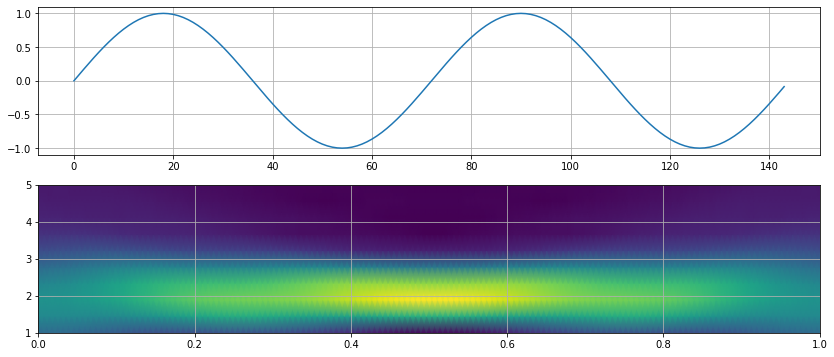

In [59]:
fig=plt.figure(figsize=(14, 6))
fig.add_subplot(2, 1, 1) 
plt.plot(X)
plt.grid()

fig.add_subplot(2, 1, 2) 
plt.pcolormesh(t, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
plt.grid()
plt.show()

Consider sin waves of different frequencies

In [67]:
timeSeriesLst = []
for f in range(1, 11):
  time_series = [] #time series of a particular freq
  for angle in range(0, 720, 5):
    angle1 = (angle/180)*math.pi
    value = math.sin(f*angle1)
    time_series.append(value)
  timeSeriesLst.append(time_series)

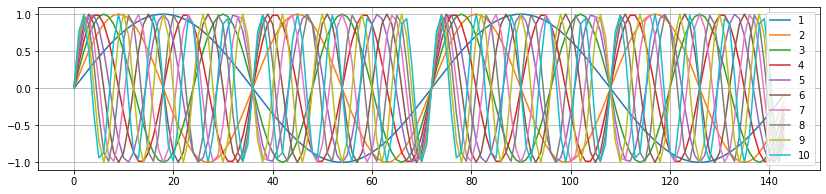

In [68]:
fig=plt.figure(figsize=(14, 3))
for i in range(len(timeSeriesLst)):
  label = str(i+1)
  plt.plot(timeSeriesLst[i], label=label)
plt.legend()
plt.grid()
plt.show()

In [71]:
len(timeSeriesLst) #10 frequencies

10

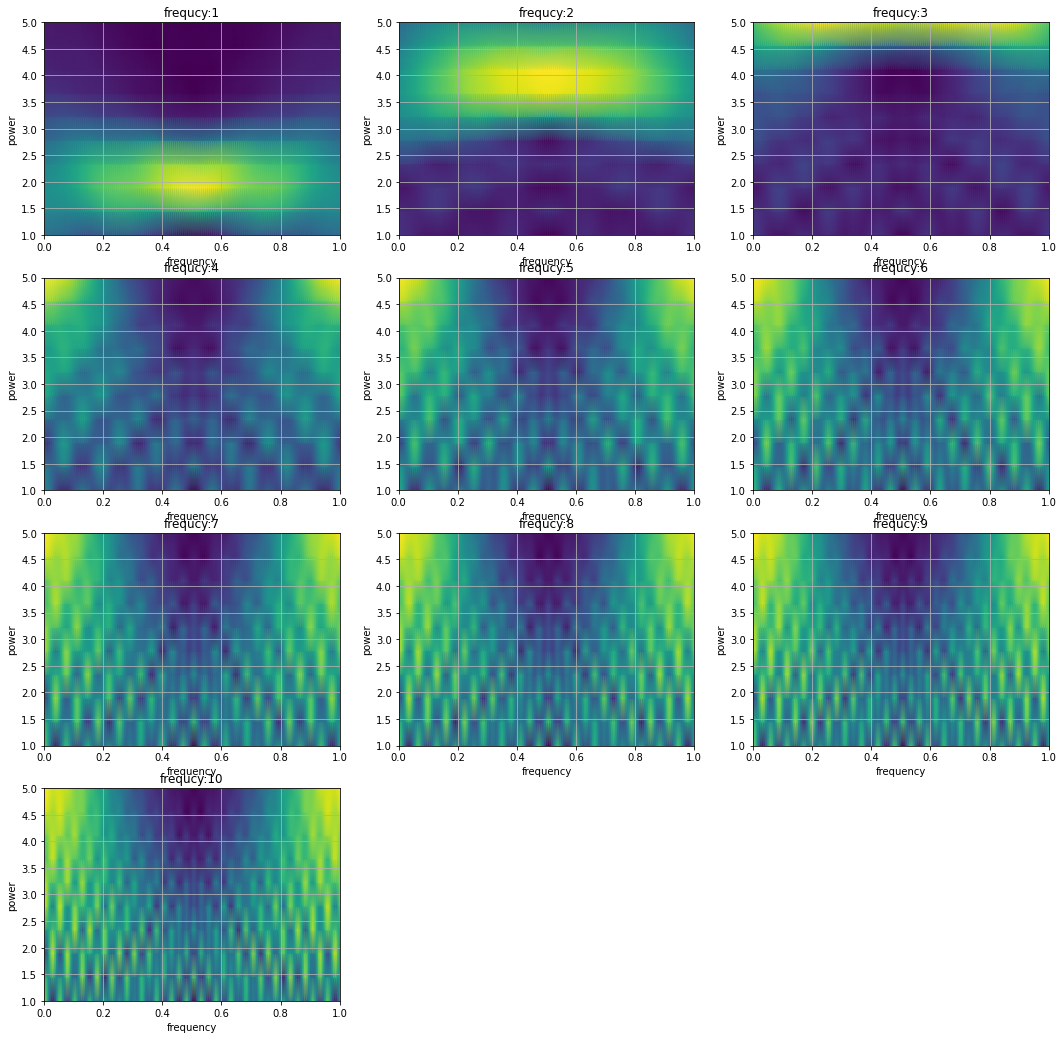

In [74]:
fig=plt.figure(figsize=(18, 18))
for i in range(len(timeSeriesLst)):
  fig.add_subplot(4, 3, (i+1)) #4rows x 3 columns
  X =np.array(timeSeriesLst[i])
  cwtm = signal.cwt(X, signal.morlet2, widths, w=w)
  plt.pcolormesh(t, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
  title = "frequcy:" + str(i+1)
  plt.title(title)
  plt.xlabel("frequency")
  plt.ylabel("power")
  plt.grid()
plt.show()

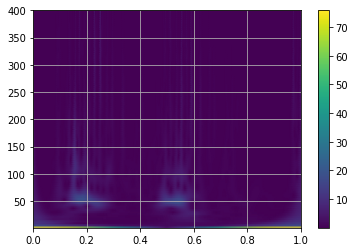

In [ ]:
# show color bar
plt.pcolormesh(t, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
plt.grid()
plt.colorbar()
plt.show()

Convert time series to 2D images

Reference: https://blog.octo.com/en/time-series-features-extraction-using-fourier-and-wavelet-transforms-on-ecg-data/


https://towardsdatascience.com/multiple-time-series-classification-by-using-continuous-wavelet-transformation-d29df97c0442

In [ ]:
import pywt

In [ ]:
scales = np.arange(1, 65) # range of scales
wavelet = 'morl' # mother wavelet

In [ ]:
# apply PyWavelets continuous wavelet transfromation function
coeffs, freqs = pywt.cwt(x, scales, wavelet = wavelet)

In [ ]:
print(coeffs.shape, freqs.shape)

(64, 750) (64,)


In [ ]:
img=np.squeeze(coeffs)
print(img.shape)

(64, 750)


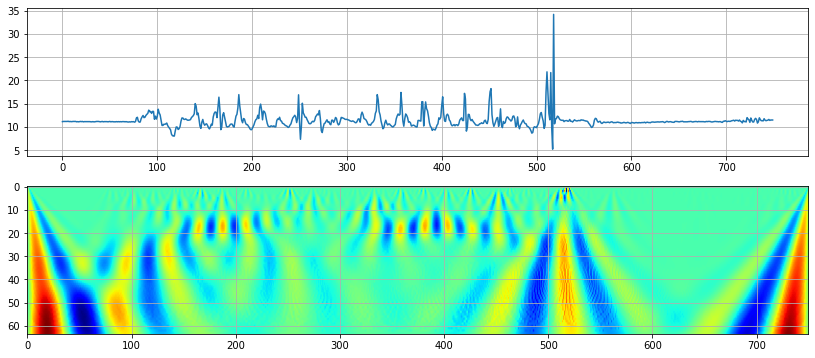

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(14, 6))
fig.add_subplot(2, 1, 1) 
plt.plot(x)
plt.grid()

fig.add_subplot(2, 1, 2) 
plt.imshow(img, cmap="jet", aspect = 'auto')
plt.grid()
plt.show()

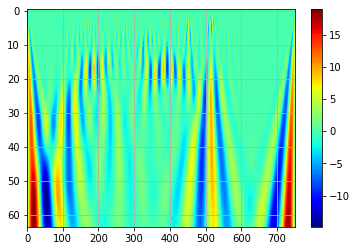

In [ ]:
# show color bar
plt.imshow(img, cmap="jet", aspect = 'auto')
plt.grid()
plt.colorbar()
plt.show()

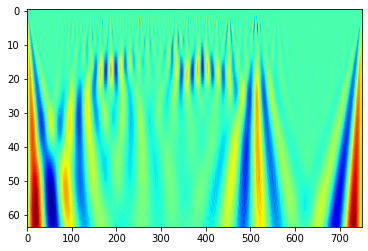

In [ ]:
# save to jpg
plt.imshow(img, cmap="jet", aspect = 'auto')
plt.savefig('ftr.jpg')

Combine together

In [ ]:
df.columns

Index(['X', 'Y', 'Z'], dtype='object')

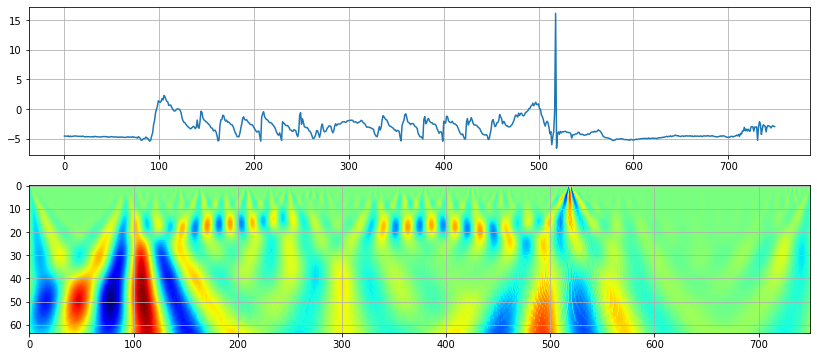

In [ ]:
dfy = df['Z']
y = np.array(dfy.values)
coeffs, freqs = pywt.cwt(y, scales, wavelet = wavelet)
img=np.squeeze(coeffs)
fig=plt.figure(figsize=(14, 6))
fig.add_subplot(2, 1, 1) 
plt.plot(y)
plt.grid()

fig.add_subplot(2, 1, 2) 
plt.imshow(img, cmap="jet", aspect = 'auto')
plt.grid()
plt.show()

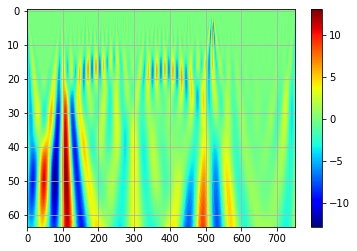

In [ ]:
plt.imshow(img, cmap="jet", aspect = 'auto')
plt.grid()
plt.colorbar()
plt.show()

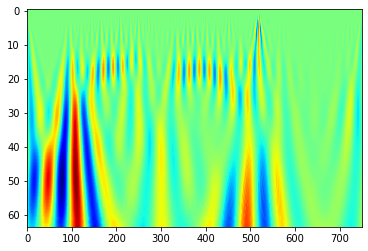

In [ ]:
plt.imshow(img, cmap="jet", aspect = 'auto')
plt.savefig('ftr.jpg')